# Quantization and sampling

In [36]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
import random
import scipy.io.wavfile


In [10]:
from google.colab import files

In [29]:
files.upload()

Saving signalpro.py to signalpro.py


{'signalpro.py': b'import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/\r\nimport numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/\r\nimport scipy as sp # for signal processing\r\nfrom scipy import signal\r\nfrom scipy.spatial import distance\r\nimport librosa\r\nimport random\r\n\r\n### SINE AND COSINE GENERATOR FUNCTIONS ###\r\n\r\ndef create_sine_waves(freqs, sampling_rate, total_time_in_secs = None, return_time = False):\r\n    \'\'\'Creates multiple sine waves corresponding to the freq array, sampling rate, and length\r\n    \r\n       Returns a tuple list of (freq, sine_wave) or (freq, (time, sine_wave))\r\n       depending on whether return_time is True or False\r\n    \'\'\'\r\n    sine_waves = []\r\n    for freq in freqs:\r\n        sine_waves.append((freq, create_sine_wave(freq, sampling_rate, total_time_in_secs, return_time)))\r\n    return sine_waves\r\n\r\ndef create_sine

In [37]:
import signalpro

### Let's load, visualize, and play an initial 16-bit, 44.1kHz sound waveform of someone saying the word "Hello."

Sampling rate: 44100 Hz
Number of channels = 1
Total samples: 48384
length = 1.0971428571428572s
[0 0 0 ... 0 0 0]
16-bit audio ranges from -32768 to 32767
Max value: 16389 Avg value: -1.03


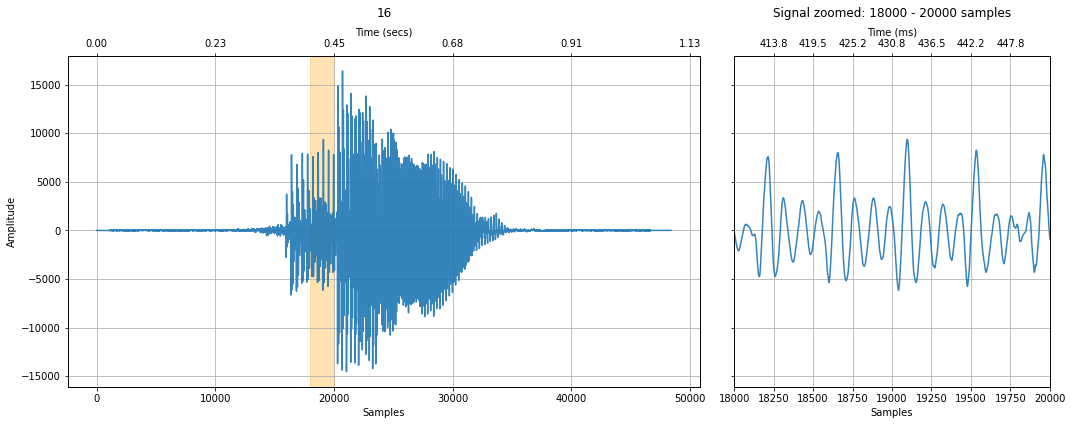

In [47]:
# Feel free to change this wave file to any 16-bit audio sample
sampling_rate, audio_data_16bit = sp.io.wavfile.read('/content/Hello.wav')
# sampling_rate, audio_data_16bit = sp.io.wavfile.read('data/audio/greenday.wav')

print(f"Sampling rate: {sampling_rate} Hz")
print(f"Number of channels = {len(audio_data_16bit.shape)}")
print(f"Total samples: {audio_data_16bit.shape[0]}")

if len(audio_data_16bit.shape) == 2:
    # convert to mono
    audio_data_16bit = convert_to_mono(audio_data_16bit)
    

length_in_secs = audio_data_16bit.shape[0] / sampling_rate
print(f"length = {length_in_secs}s")
print(audio_data_16bit)
quantization_bits = 16
print(f"{quantization_bits}-bit audio ranges from -{2**(quantization_bits - 1)} to {2**(quantization_bits - 1) - 1}")
print(f"Max value: {np.max(audio_data_16bit)} Avg value: {np.mean(audio_data_16bit):.2f}")

# We'll highlight and zoom in on the orange part of the graph controlled by xlim_zoom
xlim_zoom = (18000, 20000) # you may want to change this depending on what audio file you have loaded
signalpro.plot_signal(audio_data_16bit, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(audio_data_16bit, rate=sampling_rate)



### 8-bit quantization

[0 0 0 ... 0 0 0]
8-bit audio ranges from -128 to 127
Max value: 64 Avg value: 0.00


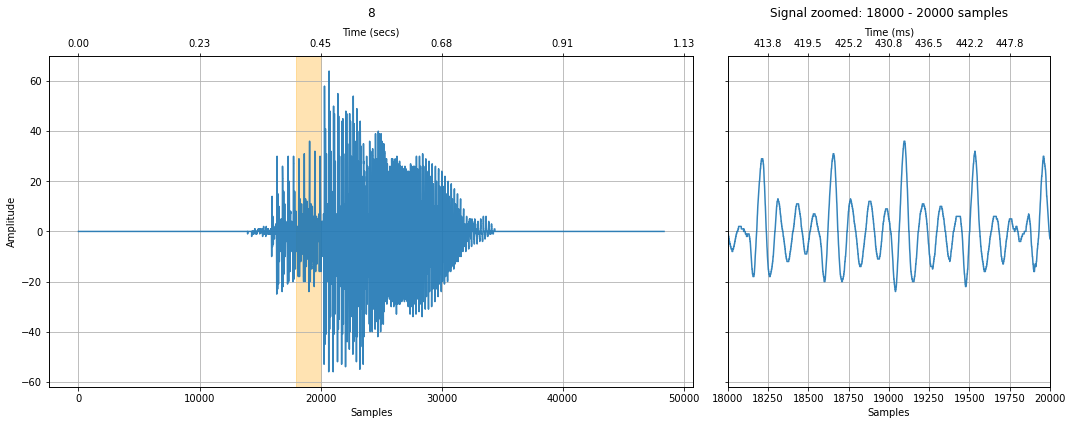

In [48]:
# Convert to float
audio_data_float = audio_data_16bit / 2**16 # 16 bit audio

# With 8-bit audio, the voice still sounds pretty good
quantization_bits = 8
audio_data_8bit = audio_data_float * 2**quantization_bits
audio_data_8bit = audio_data_8bit.astype(int)
print(audio_data_8bit)
print(f"{quantization_bits}-bit audio ranges from -{2**(quantization_bits - 1)} to {2**(quantization_bits - 1) - 1}")
print(f"Max value: {np.max(audio_data_8bit)} Avg value: {np.mean(audio_data_8bit):.2f}")

signalpro.plot_signal(audio_data_8bit, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(audio_data_8bit, rate=sampling_rate)

### 6-bit quantization

[0 0 0 ... 0 0 0]
6-bit audio ranges from -32 to 31
Max value: 16 Avg value: 0.00


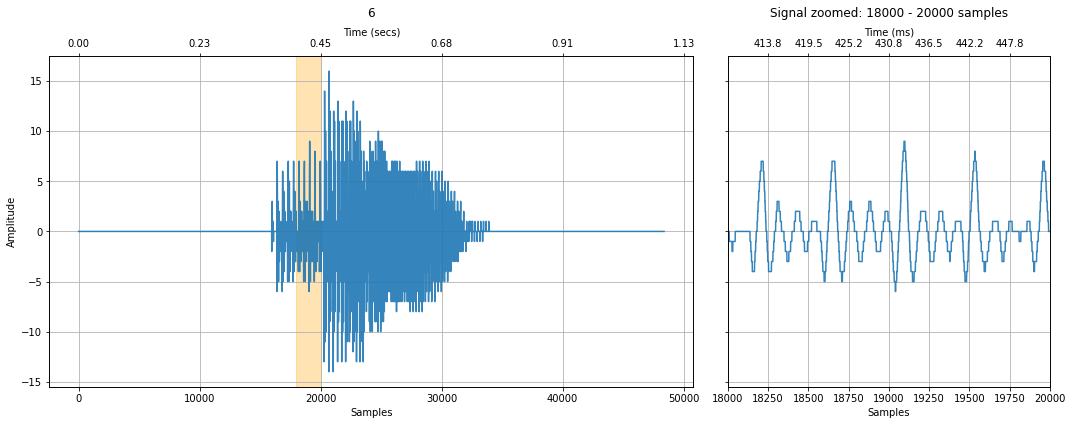

In [49]:
quantization_bits = 6
audio_data_6bit = audio_data_float * 2**quantization_bits
audio_data_6bit = audio_data_6bit.astype(int)
print(audio_data_6bit)
print(f"{quantization_bits}-bit audio ranges from -{2**(quantization_bits - 1)} to {2**(quantization_bits - 1) - 1}")
print(f"Max value: {np.max(audio_data_6bit)} Avg value: {np.mean(audio_data_6bit):.2f}")

signalpro.plot_signal(audio_data_6bit, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(audio_data_6bit, rate=sampling_rate)

### 4-bit quantization

[0 0 0 ... 0 0 0]
4-bit audio ranges from -8 to 7
Max value: 4 Avg value: 0.00


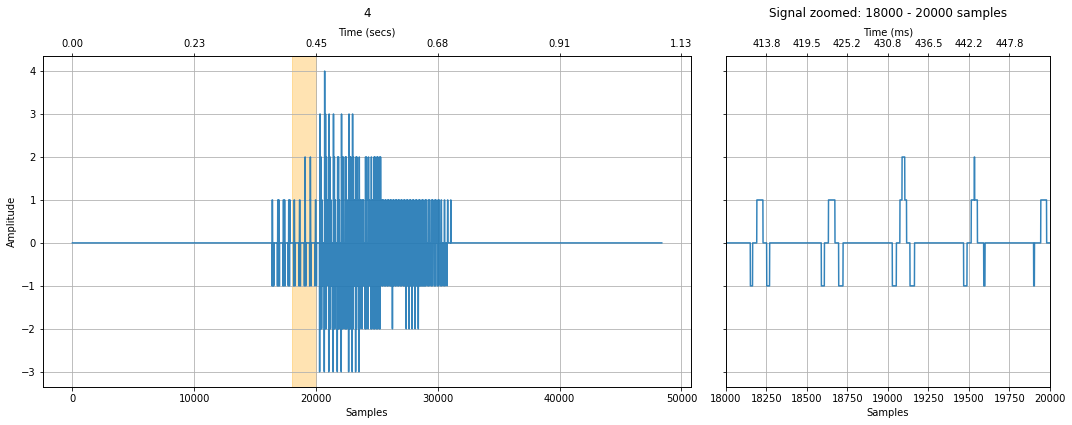

In [53]:
quantization_bits = 4
audio_data_4bit = audio_data_float * 2**quantization_bits
audio_data_4bit = audio_data_4bit.astype(int)
print(audio_data_4bit)
print(f"{quantization_bits}-bit audio ranges from -{2**(quantization_bits - 1)} to {2**(quantization_bits - 1) - 1}")
print(f"Max value: {np.max(audio_data_4bit)} Avg value: {np.mean(audio_data_4bit):.2f}")

signalpro.plot_signal(audio_data_4bit, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
ipd.Audio(audio_data_4bit, rate=sampling_rate)

### 3-bit quantization

[0 0 0 ... 0 0 0]
3-bit audio ranges from -4 to 3
Max value: 2 Avg value: -0.00


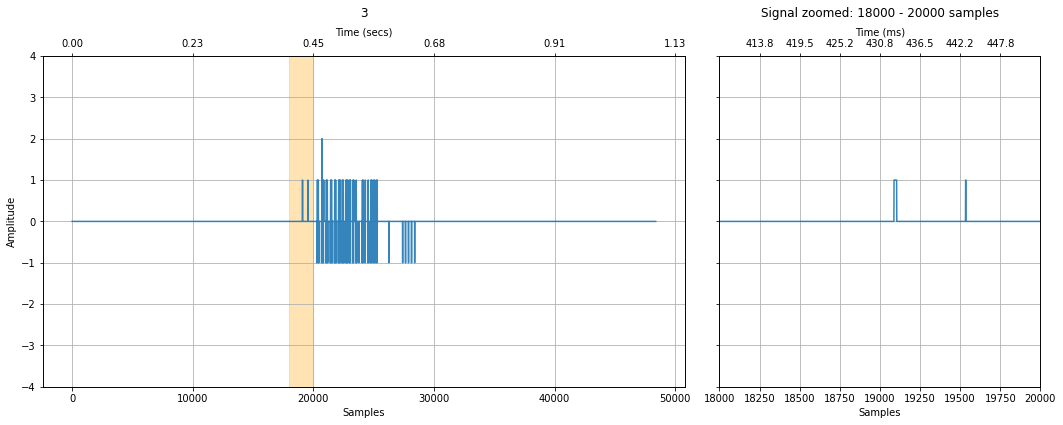

In [55]:
# 3-bit audio
quantization_bits = 3
audio_data_3bit = audio_data_float * 2**quantization_bits
audio_data_3bit = audio_data_3bit.astype(int)
print(audio_data_3bit)
print(f"{quantization_bits}-bit audio ranges from -{2**(quantization_bits - 1)} to {2**(quantization_bits - 1) - 1}")
print(f"Max value: {np.max(audio_data_3bit)} Avg value: {np.mean(audio_data_3bit):.2f}")

fig, axes = signalpro.plot_signal(audio_data_3bit, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
major_ticks = np.arange(-4, 5, 1)
axes[0].set_yticks(major_ticks)
axes[1].set_yticks(major_ticks)
ipd.Audio(audio_data_3bit, rate=sampling_rate)

### 2-bit quantization

[0 0 0 ... 0 0 0]
2-bit audio ranges from -2 to 1
Max value: 1 Avg value: 0.00


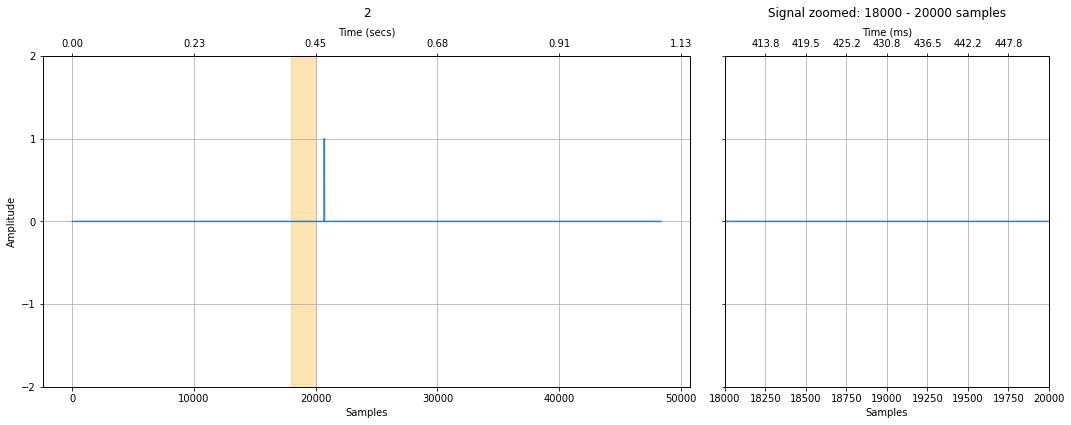

In [56]:
# 2-bit audio
quantization_bits = 2
audio_data_2bit = audio_data_float * 2**quantization_bits
audio_data_2bit = audio_data_2bit.astype(int)
print(audio_data_2bit)
print(f"{quantization_bits}-bit audio ranges from -{2**(quantization_bits - 1)} to {2**(quantization_bits - 1) - 1}")
print(f"Max value: {np.max(audio_data_2bit)} Avg value: {np.mean(audio_data_2bit):.2f}")

fig, axes = signalpro.plot_signal(audio_data_2bit, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)
#axes[1].grid(ydata=[0, 1])
major_ticks = np.arange(-2, 3, 1)
axes[0].set_yticks(major_ticks)
axes[1].set_yticks(major_ticks)
ipd.Audio(audio_data_2bit, rate=sampling_rate)